In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def computeLiquidityForPriceSimplified(price, c, s, lam):
    return lam * s / ((lam*(price*c - s)/(price*s + c))**2 + 1)**(1/2)

def computeDerivativeLiquidityForPriceSimplified(price, c, s, lam):
    return -lam**3*s*(price*c - s)/((price*s+c)**3*((lam*(price*c-s)/(price*s + c))**2+1)**(3/2))

max liquidity price 1.0


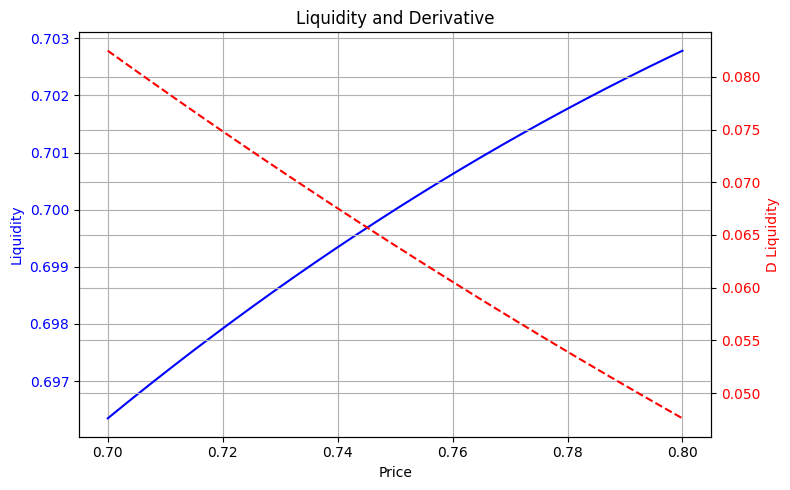

In [7]:
# alpha = 0.998502246630054917
# beta = 1.000200040008001600
# c = 0.707106781186547524
# s = 0.707106781186547524
# lam = 4000
# rate = 1.162658603238267306

# alpha = 0.999100809271655510
# beta = 1.006036217303822937
# c = 0.707036059900766447
# s = 0.707177495399846417
# lam = 3000
# rate = 1/1.209174542342395514

# alpha = 3100
# beta = 4400
# c = 0.000266047486094289
# s = 0.999999964609366945
# lam = 20000
# rate = 1

alpha = 0.7
beta = 0.8
c = 0.707106781186547524
s = 0.707106781186547524
lam = 1
rate = 1

# alpha = 0.980392156862745098
# beta = 1.052631578947368421
# c = 0.706043730947421854
# s = 0.708168235654385009
# lam = 50.000000000000000000
# rate = 1

print('max liquidity price', rate * s / c)

priceArray = np.linspace(alpha, beta, 500)
liquidity = [computeLiquidityForPriceSimplified(p, c, s, lam) for p in priceArray]
dLiquidity = [computeDerivativeLiquidityForPriceSimplified(p, c, s, lam) for p in priceArray]

startPrice = alpha*rate
endPrice = beta*rate
originalPriceArray = np.linspace(startPrice, endPrice, 500)

# Plot
fig, ax1 = plt.subplots(figsize=(8, 5))

# First y-axis
ax1.plot(originalPriceArray, liquidity, 'b-', label='Liquidity')
ax1.set_xlabel('Price')
ax1.set_ylabel('Liquidity', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Second y-axis
ax2 = ax1.twinx()
ax2.plot(originalPriceArray, dLiquidity, 'r--', label='D Liquidity')
ax2.set_ylabel('D Liquidity', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.grid(True)

# Titles and layout
plt.title('Liquidity and Derivative')
fig.tight_layout()
plt.show()

In [8]:
D100 = 1e100
D18 = 1e18
D50 = 1e50
D62 = 1e62

def computeDerivedParams(alpha, beta, c, s, lam):
    c = convertFloatTo100BigInt(c);
    s = convertFloatTo100BigInt(s);
    lam = convertFloatTo100BigInt(lam);
    alpha = convertFloatTo100BigInt(alpha);
    beta = convertFloatTo100BigInt(beta);

    dSq = (c * c + s * s) / D100; # divide by D100 to keep at 100 decimal precision
    d = bigIntSqrt(dSq) * D50; # square root reduces precision to 50 decimal places

    # dAlpha = 50 decimals
    dAlpha = D100 / bigIntSqrt(
            (((c * D100) / d + (alpha * s) / d) ** 2 * D100) / lam ** 2 +
                ((alpha * c) / d - (s * D100) / d) ** 2 / D100,
        );
    # dBeta = 50 decimals
    dBeta = D100 / bigIntSqrt(
            (((c * D100) / d + (beta * s) / d) ** 2 * D100) / lam ** 2 +
                ((beta * c) / d - (s * D100) / d) ** 2 / D100,
        );

    tauAlphaX = (((alpha * c) / D100 - s) * dAlpha) / D50
    tauAlphaY = ((((c + (s * alpha) / D100) * dAlpha) / D50) * D100) / lam

    tauBetaX = (((beta * c) / D100 - s) * dBeta) / D50
    tauBetaY = ((((c + (s * beta) / D100) * dBeta) / D50) * D100) / lam
    
    # Each multiplication must be scaled down by D100
    w = (s * c * (tauBetaY - tauAlphaY)) / (D100 * D100);
    z = (c * c * tauBetaX + s * s * tauAlphaX) / (D100 * D100);
    u = (s * c * (tauBetaX - tauAlphaX)) / (D100 * D100);
    v = (s * s * tauBetaY + c * c * tauAlphaY) / (D100 * D100);

    print38Dec("tauAlphaX", tauAlphaX);
    print38Dec("tauAlphaY", tauAlphaY);
    print38Dec("tauBetaX", tauBetaX);
    print38Dec("tauBetaY", tauBetaY);
    print38Dec("w", w);
    print38Dec("z", z);
    print38Dec("u", u);
    print38Dec("v", v);
    print38Dec("dSq", dSq);

def convertFloatTo100BigInt(floatNumber):
    return (math.floor(floatNumber * D18) * D100) / D18

def bigIntSqrt(value):
    return math.floor(value**(1/2))

def print38Dec(text, value):
    print(text, f"{(value / D62):.0f}")

computeDerivedParams(alpha, beta, c, s, lam)

tauAlphaX -17378533390904770869772025989076877312
tauAlphaY 98478355881793685067092123894344056832
tauBetaX -11043152607484651417618851378248024064
tauBetaY 99388373467361900537501525361393926144
w 455008792784103898281933401938198528
z -14210842999194712324287059401073754112
u 3167690391710059135780776946708774912
v 98933364674577792802296824627868991488
dSq 99999999999999997748809823456034029568
